In [ ]:
import pandas as pd

In [1]:
import pandas as pd

# Load datasets
sales_data = pd.read_csv('Pizza_Sale - pizza_sales.csv')  
ingredients_data = pd.read_csv('Pizza_ingredients - Pizza_ingredients.csv')

# Check for missing values
sales_data.isnull().sum()
ingredients_data.isnull().sum()



pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [2]:
# drop missing value
sales_data.dropna(inplace=True)

ingredients_data.dropna(inplace=True)

In [3]:
date_formats = ['%d/%m/%Y', '%d-%m-%Y']

# Function to parse dates
def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt, dayfirst=True)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if all formats fail

# Apply the date parsing function to the 'order_date' column
sales_data['order_date'] = sales_data['order_date'].apply(parse_dates)

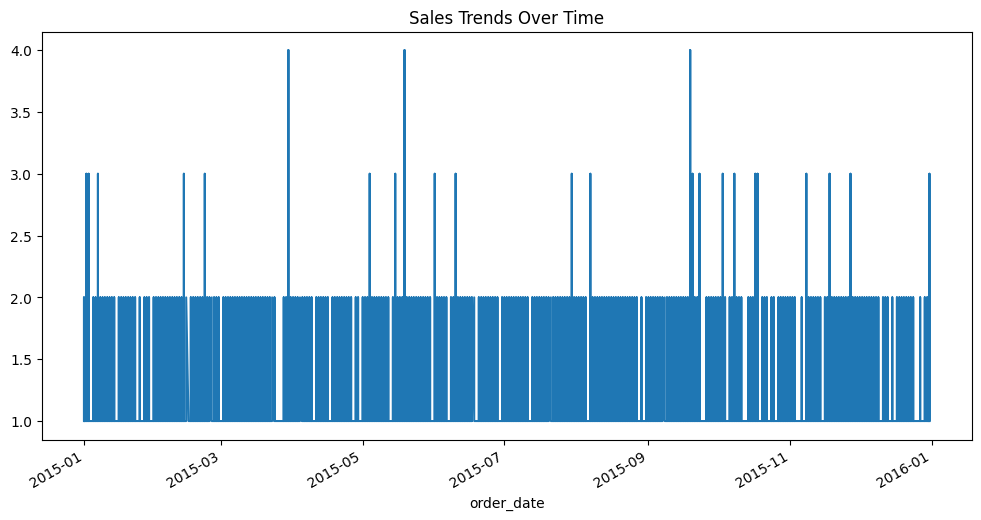

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing sales trends
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data.set_index('order_date', inplace=True)
sales_data['quantity'].plot(figsize=(12, 6))
plt.title('Sales Trends Over Time')
plt.show()


In [47]:
import holidays
import numpy as np

# Get a list of US holidays for the year 2024
ind_holidays = holidays.IN(years=[2015,2016])

# Convert the holidays to a DataFrame-friendly format
holiday_dates = list(ind_holidays.keys())
holiday_names = list(ind_holidays.values())

# # Adding these holidays to the DataFrame
sales_data['holiday'] = sales_data.index.isin(holiday_dates)


In [4]:
from datetime import datetime

# Convert order_date to datetime
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data.set_index('order_date', inplace=True)

sales_data['day_of_week'] = sales_data.index.dayofweek
sales_data['month'] = sales_data.index.month

# Extract day, month, and year into separate columns
# sales_data['order_day'] = sales_data['order_date'].dt.day
# sales_data['order_month'] = sales_data['order_date'].dt.month
#sales_df['order_year'] = sales_df['order_date'].dt.year

In [8]:
sales_data

,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month
order_date,,,,,,,,,,,,,
2015-01-01,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1
2015-01-01,2,2,classic_dlx_m,1,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1
2015-01-01,3,2,five_cheese_l,1,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1
2015-01-01,4,2,ital_supr_l,1,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1
2015-01-01,5,2,mexicana_m,1,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,48616,21348,ckn_alfredo_m,1,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,12
2015-12-31,48617,21348,four_cheese_l,1,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,12
2015-12-31,48618,21348,napolitana_s,1,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,12


In [6]:
ingredients_data 

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example with SARIMA
train_data = sales_data[:-7]  
test_data = sales_data[-7:]

model = SARIMAX(train_data['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit() 

# Forecasting
forecast = model_fit.forecast(steps=7)

c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

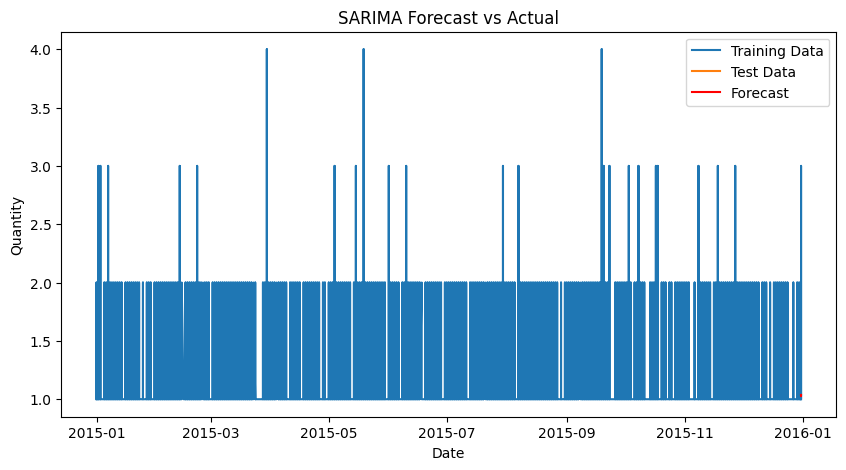

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(train_data['quantity'], label='Training Data')
plt.plot(test_data.index, test_data['quantity'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

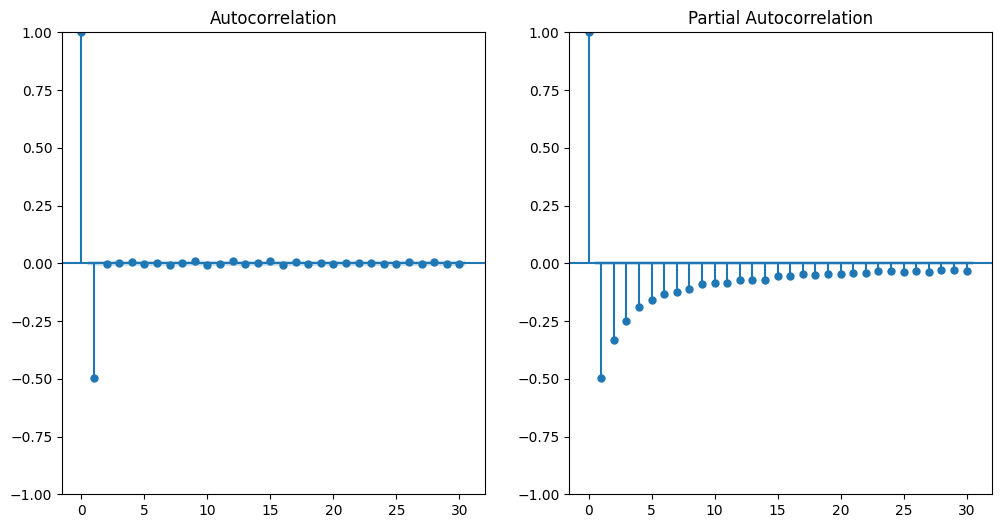

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sales_data['quantity'].diff().dropna(), lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(sales_data['quantity'].diff().dropna(), lags=30, ax=plt.gca())
plt.show()


In [70]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_data['quantity'], forecast)
print(f'MAPE: {mape}')


MAPE: 0.03518817752314586


In [71]:
# Predicting sales for the next week
predicted_sales = model_fit.forecast(steps=7)


c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
# Example of calculating ingredient needs
ingredients_needed = ingredients_data.copy()
for index, row in ingredients_needed.iterrows():
    ingredients_needed.loc[index, 'quantity_needed'] = row['Items_Qty_In_Grams'] * predicted_sales.sum()


In [76]:
ingredients_needed.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,quantity_needed
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,289.852690
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,108.694759
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,144.926345
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,217.389517
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,434.779035


In [80]:
ingredients_needed.columns = ingredients_needed.columns.str.strip()
ingredients_needed.rename(columns={'Ingredient': 'ingredient'}, inplace=True)
print([col for col in ingredients_needed.columns if 'ing' in col.lower()])

['pizza_ingredients']


In [81]:
purchase_order = ingredients_needed[['pizza_ingredients', 'quantity_needed']] 
#purchase_order.to_csv('purchase_order.csv', index=False) 

In [82]:
purchase_order 

,pizza_ingredients,quantity_needed
0,Barbecued Chicken,289.852690
1,Red Peppers,108.694759
2,Green Peppers,144.926345
3,Tomatoes,217.389517
4,Red Onions,434.779035
...,...,...
513,Green Peppers,144.926345
514,Red Onions,144.926345
515,Zucchini,72.463172
516,Spinach,108.694759


LinearRegression Model

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Feature Engineering
sales_data['day_of_week'] = sales_data.index.dayofweek
sales_data['month'] = sales_data.index.month
# sales_data['lag_1'] = sales_data['quantity'].shift(1)
# sales_data['lag_7'] = sales_data['quantity'].shift(7)
# sales_data['rolling_mean_7'] = sales_data['quantity'].rolling(window=7).mean()

sales_data.dropna(inplace=True)

# Prepare the data
#X = sales_data[['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7']]
X = sales_data[['day_of_week']]
y = sales_data['quantity']




In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# Make predictions
y_pred = model_lin.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.021349291954083246


In [30]:
ingredients_data.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [38]:
predicted_sales = forecast  
ingredients_data['predicted_quantity'] = ingredients_data['Items_Qty_In_Grams'].map(predicted_sales)


In [39]:
ingredients_data['required_quantity'] = (
    ingredients_data['Items_Qty_In_Grams'] * ingredients_data['predicted_quantity']
)


In [40]:
purchase_order = ingredients_data[['pizza_ingredients', 'required_quantity']]
purchase_order


,pizza_ingredients,required_quantity
0,Barbecued Chicken,NaN
1,Red Peppers,NaN
2,Green Peppers,NaN
3,Tomatoes,NaN
4,Red Onions,NaN
...,...,...
513,Green Peppers,NaN
514,Red Onions,NaN
515,Zucchini,NaN
516,Spinach,NaN


HistGradientBoostingRegressor Model

In [28]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model_his = HistGradientBoostingRegressor()
model_his.fit(X_train, y_train)

# Make predictions
y_pred = model_his.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.02134907646243069
